In [68]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from copy import deepcopy

In [2]:
example_board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]

In [37]:
def plot_board(input_board: List[List[str]]):
    fig, ax = plt.subplots()
    min_val, max_val = 0, 9

    for i in range(9):
        for j in range(9):
            c = input_board[i][j]
            if c == '.':
                continue
            ax.text(j+0.5, 9-i-0.5, c, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.vlines(range(9), ymin=0, ymax=9, color='k', linestyles='dashed', linewidth=1)
    ax.hlines(range(9), xmin=0, xmax=9, color='k', linestyles='dashed', linewidth=1)
    ax.vlines([3, 6], ymin=0, ymax=9, color='k', linestyles='solid', linewidth=2)
    ax.hlines([3, 6], xmin=0, xmax=9, color='k', linestyles='solid', linewidth=2)


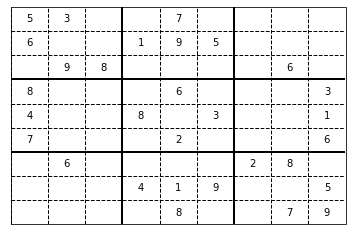

In [38]:
plot_board(example_board)

In [64]:
def get_row_list(row_index: int, board: List[List[str]]) -> List[int]:
    return [int(entry) for entry in board[row_index] if entry != "."]

def get_column_list(column_index: int, board: List[List[str]]) -> List[int]:
    return [int(row[column_index]) for row in board if row[column_index] != "."] 

def get_box_list(row_index: int, column_index: int, board: List[List[str]]) -> List[int]:
    box_list = []
    for i in range((row_index // 3)*3, (row_index // 3)*3 + 3):
        for j in range((column_index // 3)*3, (column_index // 3)*3 + 3):
            if board[i][j] != ".":
                box_list.append(int(board[i][j]))
    return box_list


In [84]:
def get_possible_values(row_index: int, column_index: int, board: List[List[str]]) -> List[int]:
    possible_values = []
    for candidate in range(1, 10):
        if candidate not in get_row_list(row_index, board) \
            and candidate not in get_column_list(column_index, board)\
            and candidate not in get_box_list(row_index, column_index, board):
            possible_values.append(candidate)
    return possible_values
        

In [69]:
solving_board = deepcopy(example_board)

In [82]:
def solve_board(board: List[List[str]]):
    np_board = np.array(board)
    empty_entries = np.sum(np_board == ".")
    prev_empty_entries = 9*9
    while empty_entries > 0 and empty_entries < prev_empty_entries:
        for row_index in range(9):
            for column_index in range(9):
                if np_board[row_index, column_index] == ".":
                    candidates = get_possible_values(row_index, column_index, np_board)
                    if len(candidates) == 1:
                        np_board[row_index, column_index] = str(candidates[0])
        prev_empty_entries = empty_entries
        empty_entries = np.sum(np_board == ".")
        plot_board(np_board)
    return np_board


array([['5', '3', '4', '6', '7', '8', '9', '1', '2'],
       ['6', '7', '2', '1', '9', '5', '3', '4', '8'],
       ['1', '9', '8', '3', '4', '2', '5', '6', '7'],
       ['8', '5', '9', '7', '6', '1', '4', '2', '3'],
       ['4', '2', '6', '8', '5', '3', '7', '9', '1'],
       ['7', '1', '3', '9', '2', '4', '8', '5', '6'],
       ['9', '6', '1', '5', '3', '7', '2', '8', '4'],
       ['2', '8', '7', '4', '1', '9', '6', '3', '5'],
       ['3', '4', '5', '2', '8', '6', '1', '7', '9']], dtype='<U1')

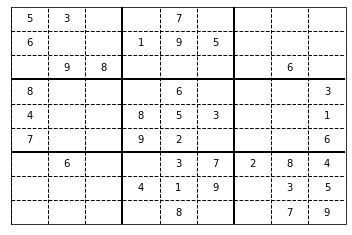

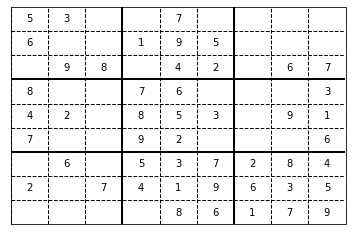

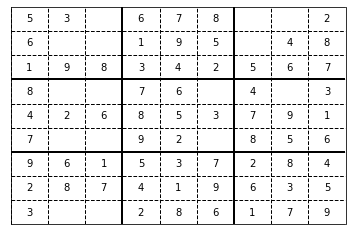

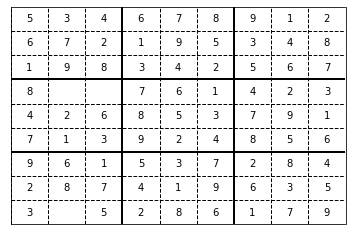

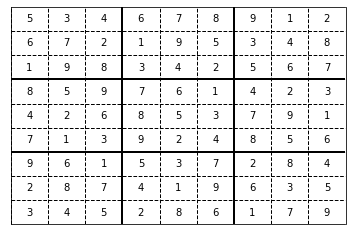

In [86]:
solve_board(solving_board)